A. TIME VALUE OF MONEY - BOND AND STOCK VALUATION

Giá trị tương lai (Future value-FV)
Ví dụ: Ông A gửi tiền tiết kiệm 100 triệu đồng vào ngân hàng Vietcombank theo kỳ hạn gửi là 1 năm, với lãi suất 4.6%/năm. Sau 5 năm ông A mới rút tiền gốc và lãi. Hỏi sau 5 năm ông A nhận được số tiền là bao nhiêu?

In [2]:
import numpy_financial as npf
npf.fv(0.046,5,0,-100)
#với rate= 4.6%
# nper= 5
# pmt= 0 vì ông A gửi 1 lần
# pv =-100 số âm vì là số tiền ông A bỏ ra

np.float64(125.21559532429762)

Ví dụ: Mark Young vừa trúng giải xổ số, chi trả $50.000 một năm trong vòng 20 năm. Lần thanh toán đầu tiên sau 1 năm kể từ bây giờ. Chính phủ quảng cáo đây là Giải Triệu Phú bởi vì $1.000.000 = $50.000 x 20. Nếu lãi suất là 8%, giá trị hiện tại của giải thưởng này là bao nhiêu?

In [3]:
import numpy_financial as npf
npf.pv(0.08,20,-50000,0)
#rate= 8%
# nper= 20 năm
# pmt =-50000,số tiền chính phủ phải chi trả hằng năm
# fv= 0, vì sau 20 năm đã chi trả hết tiền thưởng

np.float64(490907.3703724647)

Ví dụ Giả sử bạn sẽ nhận được các khoản thanh toán hàng năm trong 5 năm,với khoản thanh toán đầu tiên là 10 triệu đồng. Các khoản thanh toán này sẽ tăng trưởng hàng năm với tỷ lệ 5%. Lãi suất chiết khấu là 8%. Tính giá trị hiện tại (PV) và giá trị tương lai (FV) của chuỗi thanh toán này.

In [ ]:
def pv_growing_annuity(C, r, g, n):
    if r <= g:
        print("Lãi suất chiết khấu (r) phải > tỷ lệ tăng trưởng (g)")
    else:
        return C * (1 - ((1 + g) / (1 + r))**n) / (r - g)
   
def fv_growing_annuity(C, r, g, n):
    if r <= g:
        print("Lãi suất (r) phải > tỷ lệ tăng trưởng (g)")
    else:
        return C * ((1 + r)**n - (1 + g)**n) / (r - g)
# theo như Ví dụ
# C = 10      # Dòng tiền năm đầu (triệu đồng)
# r = 0.08    # Lãi suất chiết khấu 8%
# g = 0.05    # Tăng trưởng 5% mỗi năm
# n = 5       # Số năm

PV = pv_growing_annuity(10, 0.08, 0.05, 5)
FV = fv_growing_annuity(10, 0.08, 0.05, 5)

print(PV)
print(FV)

43.79473795950539
64.34883810000007


Xem xét một dự án tiềm năng với khoản đầu tư ban đầu là 40.000$ và các dòng tiền dự kiến lần lượt là 5.000$, 8.000$, 12.000$ và 30.000$ vào cuối mỗi kỳ. Với mức lãi suất chiết khấu là 8% mỗi kỳ, hãy tính giá trị hiện tại ròng (NPV) của dự án.

In [5]:
#Tính NPV
import numpy_financial as npf
cashflows = [-40000,5000, 8000, 12000, 30000]
rate = 0.08
npv = npf.npv(rate, cashflows) 
npv = round(npv,2)
print(f"Giá trị hiện tại thuần của dự án đầu tư = {npv:}$")

Giá trị hiện tại thuần của dự án đầu tư = 3065.22$


Giả sử, một doanh nghiệp đang xem xét đầu tư vào một dự án với chi phí ban đầu là 20.000$. Dự kiến dự án sẽ mang lại dòng tiền lần lượt là 8.500$ vào năm thứ nhất, 10.200$ vào năm thứ hai và 6.200$ vào năm thứ ba. Hãy xác định tỷ suất hoàn vốn nội bộ (IRR) của dự án. Ta có thể sử dụng hàm irr từ thư viện numpy-financial để tính tỷ suất hoàn vốn nội bộ (IRR) của dự án.

In [6]:
import numpy_financial as npf
# Danh sách dòng tiền: âm ở thời điểm đầu tư, dương ở các năm tiếp theo
cash_flows = [-20000, 8500, 10200, 6200]
# Tính IRR
irr = npf.irr(cash_flows)
# Chuyển đổi sang phần trăm và làm tròn
irr_percent = round(irr * 100, 2)
print(f"IRR = {irr_percent}%")

IRR = 12.41%


Kiểm tra liệu tỷ lệ như vậy có làm cho NPV bằng không

In [7]:
# Dòng tiền
cash_flows = [-20000, 8500, 10200, 6200]
# Khai báo tỷ lệ IRR
irr = npf.irr(cash_flows)
# Tính NPV thủ công dựa trên IRR
npv = 0
for t in range(len(cash_flows)):
    npv += cash_flows[t] / (1 + irr) ** t
# Làm tròn kết quả NPV
npv = round(npv, 2)
# In kết quả
print(f"Giá trị hiện tại thuần của dự án đầu tư = {npv:}")

Giá trị hiện tại thuần của dự án đầu tư = 0.0


Một doanh nghiệp dự định thực hiện một dự án đầu tư dài hạn. Dự án yêu cầu chi phí đầu tư ban đầu là 120 triệu đồng tại thời điểm hiện tại (năm 0), và đầu tư bổ sung 60 triệu đồng vào năm 1. Trong 5 năm tiếp theo, dự án dự kiến mang lại dòng tiền thu về lần lượt là 40 triệu, 80 triệu, 110 triệu, 100 triệu và 30 triệu đồng. Hãy tính IRR của dự án dựa trên dòng tiền đã cho. Biết chi phí vốn của doanh nghiệp là 10%, hãy kết luận liệu doanh nghiệp có nên chấp nhận dự án hay không.

In [8]:
import numpy_financial as npf
# Dòng tiền từ năm 0 đến năm 6
cash_flows = [-120, -60, 40, 80, 110, 100, 30]
# Tính IRR
irr = npf.irr(cash_flows)
# Chuyển sang phần trăm và làm tròn
irr_percent = round(irr * 100, 2)
print(f"IRR = {irr_percent}%")

IRR = 21.48%


Giả sử rằng dòng tiền của chúng ta sẽ là 504, -432, -432, -432 và 843, bắt đầu từ hôm nay

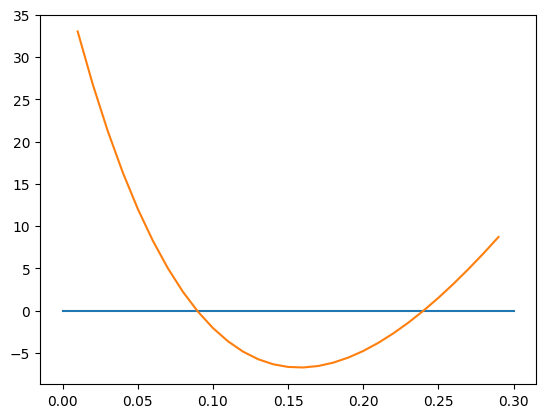

In [9]:
# Vẽ biểu đồ 2 IRR
import numpy_financial as npf
import matplotlib.pyplot as plt
cashflows=[504,-432,-432,-432,832]
rate=[]
npv=[]
x=[0,0.3]
y=[0,0]
for i in range(1,30):
 rate.append(0.01*i)
 npv.append(npf.npv(0.01*i,cashflows))

plt.plot(x,y),plt.plot(rate,npv)
plt.show()

Giả sử rằng một công ty có kế hoạch vay 10 triệu đô la cho một dự án đầu tư dài hạn. Ngân hàng A đưa ra lãi suất kép hàng năm là 8% nửa năm một lần, trong khi ngân hàng B cung cấp lãi suất kép 7,9% hàng quý. Đối với công ty, lãi suất vay nào rẻ hơn?

In [ ]:
#  Ví dụ - EAR
def tinh_ear(apr, so_ky_ghép):
    return (1 + apr / so_ky_ghép) ** so_ky_ghép - 1

# Lãi suất danh nghĩa
lai_suat_A = 0.08  # 8%/năm, ghép lãi 2 lần/năm
lai_suat_B = 0.079  # 7.9%/năm, ghép lãi 4 lần/năm

# Tính EAR
ear_A = tinh_ear(lai_suat_A, 2)
ear_B = tinh_ear(lai_suat_B, 4)

# In kết quả
print(f"EAR Ngân hàng A: {ear_A:.4%}")
print(f"EAR Ngân hàng B: {ear_B:.4%}")

# So sánh
if ear_A < ear_B:
    print("Ngân hàng A có lãi suất hiệu dụng thấp hơn → Rẻ hơn.")
else:
    print("Ngân hàng B có lãi suất hiệu dụng thấp hơn → Rẻ hơn.")

EAR Ngân hàng A: 8.1600%
EAR Ngân hàng B: 8.1371%
Ngân hàng B có lãi suất hiệu dụng thấp hơn → Rẻ hơn.


Ngân hàng A: APR = 8%, ghép nửa năm một lần
Ngân hàng B: APR = ?, ghép hàng quý
Nếu chúng ta muốn so sánh mức sinh lời thực tế của hai đề nghị này, chúng ta không thể so sánh trực tiếp các lãi suất danh nghĩa, vì tần suất ghép khác nhau tạo ra mức lãi kép khác nhau. 

In [12]:
# Cách 2: Chuyển đổi từ tỷ lệ hiệu quả này sang tỷ lệ hiệu quả khác
APR_A = 0.08   # APR của Ngân hàng A
m1 = 2         # Ghép lãi nửa năm
m2 = 4         # Quy đổi sang ghép lãi hàng quý
def APR2APR(APR1, m1, m2):
    R = (1 + APR1 / m1) ** (m1 / m2) - 1
    return R * m2

APR_B = APR2APR(APR_A, m1, m2)
print(APR_B)

0.07921561087422813


Ngân hàng A cung cấp mức lãi suất danh nghĩa là 8%/năm, với lãi ghép nửa năm một lần. Tính lãi suất hiệu dụng hàng năm (EAR) tương ứng.

In [13]:
# Tính EAR CỦA NGÂN HÀNG A
APR_A = 0.08  # 8%/năm
m = 2       # Ghép lãi nửa năm một lần
def EAR_f(APR_A, m):
    return (1 + APR_A / m)**m - 1
EAR_A = EAR_f(APR_A, m)
print(EAR_A)

0.08160000000000012


Ngân hàng B cung cấp mức lãi suất danh nghĩa là 7,9215610874%/năm, với lãi ghép 4 lần một năm. Tính lãi suất hiệu dụng hàng năm (EAR) tương ứng.

In [14]:
# Tính EAR CỦA NGÂN HÀNG B
APR_B = 0.07921561087422813  # 8%/năm
m = 4      # Ghép lãi nửa năm một lần
def EAR_f(APR_B, m):
    return (1 + APR_B / m)**m - 1
EAR_B = EAR_f(APR_B, m)
print(EAR_B)

0.08160000000000034


Giả sử rằng APR là 2,34% kép nửa năm một lần. Rc tương đương của nó là gì?

In [ ]:
# Lãi suất kép liên tục
from math import log
Rc=2*log(1+0.0234/2)
print(Rc)

# Tính Rc
import math
def APR2Rc(APR, m):
    return m * math.log(1 + APR / m)
APR = 0.0234  # 2.34%
m = 2         # ghép nửa năm một lần
Rc = APR2Rc(APR, m)
print(f"Rc tương đương (lãi suất ghép liên tục): {Rc:.10f}")

# Tính ngược lại APR
from math import exp
def Rc2APR(Rc, m):
    return m * (exp(Rc / m) - 1)
Rc = 0.023264168459415393  # 2% ghép liên tục
m = 2      # Ghép nửa năm một lần
APR = Rc2APR(Rc, m)
print(f"APR tương đương với Rc = {APR:.4f}")

# Tính lãi suất ghép lãi rời rạc mỗi kỳ từ lãi suất ghép liên tục hàng năm
from math import exp
def Rc2Rm(Rc, m):
    return exp(Rc / m) - 1
Rc = 0.02  # 2% lãi ghép liên tục mỗi năm
m = 2      # ghép lãi nửa năm một lần
Rm = Rc2Rm(Rc, m)
print(f"Lãi suất mỗi kỳ (Rm) với Rc = {Rc:.2%} và m = {m}: {Rm:.6%}")

0.023264168459415393
Rc tương đương (lãi suất ghép liên tục): 0.0232641685
APR tương đương với Rc = 0.0234
Lãi suất mỗi kỳ (Rm) với Rc = 2.00% và m = 2: 1.005017%


Ví dụ: CTCP X đã phát hành một loại trái phiếu có mệnh giá là 100.000 đồng, lãi suất trái phiếu là 10%/năm, mỗi năm trả lãi một lần vào cuối năm với kỳ hạn là 5 năm. Loại trái phiếu này đã lưu hành 2 năm và trả lãi 2 lần. Hiện trái phiếu đang được rao bán với giá 105.000 đồng. Một nhà đầu tư đang cân nhắc mua trái phiếu này và dự tính sẽ nắm giữ đến khi đáo hạn. Nếu nhà đầu tư yêu cầu mức sinh lời 9%/năm, thì có nên mua trái phiếu với giá 105.000 đồng hay không?

In [16]:
import numpy_financial as npf
# Thông số
rate = 0.09      # Lãi suất yêu cầu
nper = 3         # Số kỳ còn lại
fv = 100000      # Mệnh giá trái phiếu
pmt = fv*0.1      # Tiền lãi mỗi kỳ
# Tính PV (hiện tại trái phiếu trả lãi cuối mỗi năm)
pv = -npf.pv(rate=rate, nper=nper, pmt=pmt, fv=fv)
# In kết quả
print(f"Giá trị hiện tại của trái phiếu (dùng numpy_financial): {pv:.2f} đồng")
# So sánh với giá thị trường
market_price = 105000
if pv < market_price:
    print("→ Không nên mua vì giá trị hiện tại thấp hơn giá thị trường.")
else:
    print("→ Nên mua vì giá trị hiện tại cao hơn hoặc bằng giá thị trường.")

Giá trị hiện tại của trái phiếu (dùng numpy_financial): 102531.29 đồng
→ Không nên mua vì giá trị hiện tại thấp hơn giá thị trường.


Ví dụ: Công ty C có tốc độ tăng trưởng trong 3 năm đầu là 18%/năm (g1), kể từ năm thứ tư tốc độ tăng trưởng cổ tức giảm còn 7%/năm và duy trì mãi mãi (g2). Công ty đang trả cổ tức cho cổ đông 4500đ/1 cổ phiếu (D0). Tính hiện giá cổ phiếu (P0), biết lãi suất thị trường là 13%/năm.

In [7]:
# Thông số đầu vào
D0 = 4500          
g1 = 0.18         
g2 = 0.07          
r = 0.13           
# Tính cổ tức từng năm
D1 = D0 * (1 + g1)
D2 = D1 * (1 + g1)
D3 = D2 * (1 + g1)
D4 = D3 * (1 + g2)
# Tính P3
P3 = D4 / (r - g2)
# Các dòng tiền
cash_flows = [D1, D2, D3 + P3]
# Tự tính NPV: Discount dòng tiền về hiện tại
P0 = sum(cash_flows[i] / (1 + r) ** (i + 1) for i in range(len(cash_flows)))
print(f"Giá hiện tại của cổ phiếu (P0) là: {P0:.2f} đồng")

Giá hiện tại của cổ phiếu (P0) là: 106111.29 đồng


B. PORTFOLIO THEORY

Giả sử nhà đầu tư đang cân nhắc đầu tư vào hai cổ phiếu là FPT và HPG. Dựa trên số liệu giả định, ta có thông tin sau:
Độ lệch chuẩn hàng năm của FPT: FPT = 0.18
Độ lệch chuẩn hàng năm của HPG: HPG= 0.3
Hệ số tương quan giữa FPT và HPG:  = -1 (tương quan âm - giả định)
Hãy xác định tỷ trọng đầu tư tối ưu vào mỗi cổ phiếu sao cho rủi ro danh mục đầu tư là thấp nhất có thể, lưu ý: w_2 = 1 - w_1. Bằng cách áp dụng công thức tổng quát của phương sai lợi nhuận danh mục đầu tư 2 cổ phiếu. 

In [1]:
# Tối ưu hóa tỷ trọng đầu tư
import numpy as np
sigma1 = 0.18  # FPT
sigma2 = 0.3  # HPG
var1 = sigma1**2
var2 = sigma2**2
rho = -1       # giả định tương quan âm hoàn toàn
n = 1000
tiny = 1.0 / n
portVar = 10  # khởi tạo với giá trị lớn
for i in range(n + 1):
    w1 = i * tiny
    w2 = 1 - w1
    var = w1**2 * var1 + w2**2 * var2 + 2 * w1 * w2 * rho * sigma1 * sigma2
    if var < portVar:
        portVar = var
        finalW1 = w1
print("Độ lệch chuẩn danh mục tối thiểu:", np.sqrt(portVar))
print("Tỷ trọng đầu tư FPT (w1):", finalW1)
print("Tỷ trọng đầu tư HPG (w2):", 1 - finalW1)

Độ lệch chuẩn danh mục tối thiểu: 0.0
Tỷ trọng đầu tư FPT (w1): 0.625
Tỷ trọng đầu tư HPG (w2): 0.375


Giả sử nhà đầu tư đang xem xét xây dựng một danh mục đầu tư gồm ba cổ phiếu, bao gồm: VCB, MWG, VNM với trọng số đầu tư, lợi suất kỳ vọng và phương sai lợi suất lần lượt là w = [0.4, 0.35, 0.25]; E(R_i) (%) = [11,16,10];  phương sai lợi suất = [0.03, 0.06, 0.028], có ma trận hiệp phương sai.
Hãy tính: Lợi nhuận kỳ vọng danh mục E(R_p). Phương sai lợi nhuận danh mục. Lợi nhuận thực tế danh mục R_p

In [3]:
# Danh mục đầu tư N cổ phiếu
import numpy as np
# Trọng số danh mục
w = np.array([0.4, 0.35, 0.25])
# Lợi nhuận kỳ vọng từng cổ phiếu (%)
E_R = np.array([0.11, 0.16, 0.10])
# Ma trận hiệp phương sai
cov_matrix = np.array([
    [0.030, 0.020, 0.014],
    [0.020, 0.060, 0.018],
    [0.014, 0.018, 0.028]
])
# Lợi nhuận thực tế
R_actual = np.array([0.12, 0.14, 0.08])

# Lợi nhuận kỳ vọng danh mục
E_Rp = np.dot(w, E_R)

# Phương sai lợi nhuận danh mục
var_Rp = np.dot(w.T, np.dot(cov_matrix, w))

# Lợi nhuận thực tế
R_p_actual = np.dot(w, R_actual)
print(f"Lợi nhuận kỳ vọng danh mục: {E_Rp*100:.2f}%")
print(f"Phương sai lợi nhuận danh mục: {var_Rp:.6f}")
print(f"Độ lệch chuẩn (rủi ro): {np.sqrt(var_Rp)*100:.2f}%")
print(f"Lợi nhuận thực tế danh mục: {R_p_actual*100:.2f}%")

Lợi nhuận kỳ vọng danh mục: 12.50%
Phương sai lợi nhuận danh mục: 0.025450
Độ lệch chuẩn (rủi ro): 15.95%
Lợi nhuận thực tế danh mục: 11.70%


Một nhà đầu tư đang cân nhắc phân bổ vốn giữa hai tài sản tài chính: tài sản A có lợi suất kỳ vọng 12%, độ lệch chuẩn 30%; tài sản B có lợi suất kỳ vọng 6%, độ lệch chuẩn 15%. Hệ số tương quan giữa hai tài sản là -0.5, cho thấy khả năng đa dạng hóa rủi ro. Tỷ trọng đầu tư vào tài sản A được điều chỉnh từ 0% đến 100%. Tính toán lợi suất kỳ vọng và rủi ro (đo bằng độ lệch chuẩn) của danh mục ứng với mỗi tỷ trọng, sau đó vẽ đường biên hiệu quả và tìm danh mục có rủi ro thấp nhất.

   Tỷ trọng A  Tỷ trọng B  Lợi suất kỳ vọng  Rủi ro (std)
0      0.0000      1.0000            0.0600        0.1500
1      0.0101      0.9899            0.0606        0.1470
2      0.0202      0.9798            0.0612        0.1440
3      0.0303      0.9697            0.0618        0.1411
4      0.0404      0.9596            0.0624        0.1383
5      0.0505      0.9495            0.0630        0.1355
6      0.0606      0.9394            0.0636        0.1328
7      0.0707      0.9293            0.0642        0.1301
8      0.0808      0.9192            0.0648        0.1275
9      0.0909      0.9091            0.0655        0.1250


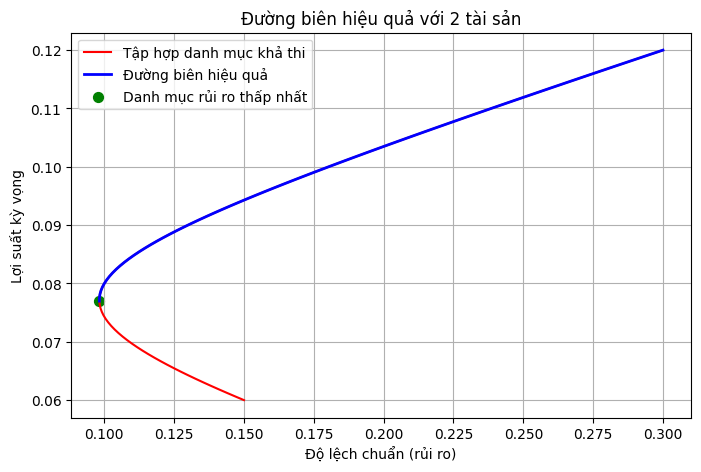

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử 2 tài sản
returns = np.array([0.12, 0.06])
std_devs = np.array([0.30, 0.15])
rho = -0.5

# Tỷ trọng tài sản A từ 0 đến 1
weights_A = np.linspace(0, 1, 100)
weights_B = 1 - weights_A

# Tính lợi suất và độ lệch chuẩn danh mục
portfolio_returns = weights_A * returns[0] + weights_B * returns[1]
portfolio_variances = (
    (weights_A * std_devs[0])**2 +
    (weights_B * std_devs[1])**2 +
    2 * weights_A * weights_B * std_devs[0] * std_devs[1] * rho
)
portfolio_std = np.sqrt(portfolio_variances)
df = pd.DataFrame({
    "Tỷ trọng A": weights_A,
    "Tỷ trọng B": weights_B,
    "Lợi suất kỳ vọng": portfolio_returns,
    "Rủi ro (std)": portfolio_std
})
print(df.round(4).head(10)) 

# Tìm danh mục có rủi ro thấp nhất
min_var_index = np.argmin(portfolio_std)
min_std = portfolio_std[min_var_index]
min_return = portfolio_returns[min_var_index]

# Vẽ đồ thị
plt.figure(figsize=(8,5))
plt.plot(portfolio_std, portfolio_returns, label="Tập hợp danh mục khả thi", color='red')
plt.plot(portfolio_std[min_var_index:], portfolio_returns[min_var_index:], 
         label="Đường biên hiệu quả", color='blue', linewidth=2)
plt.scatter(min_std, min_return, color='green', s=50, label="Danh mục rủi ro thấp nhất")
# Thêm chú thích
plt.title("Đường biên hiệu quả với 2 tài sản")
plt.xlabel("Độ lệch chuẩn (rủi ro)")
plt.ylabel("Lợi suất kỳ vọng")
plt.legend()
plt.grid(True)
plt.show()

Một nhà đầu tư đang cân nhắc đầu tư vào tài sản A (lợi suất kỳ vọng 10%, độ lệch chuẩn 20%) và tài sản B (lợi suất kỳ vọng 6%, độ lệch chuẩn 10%). Hệ số tương quan giữa hai tài sản là -0.2 , cho thấy tiềm năng đa dạng hóa rủi ro nhờ sự biến động nghịch chiều. Giả định lãi suất phi rủi ro là 3% , hãy tính lợi suất kỳ vọng và độ lệch chuẩn của danh mục, sau đó sử dụng hệ số Sharpe để đánh giá mức sinh lời đã điều chỉnh theo rủi ro 

In [5]:
import numpy as np

# Thông tin tài sản
r_A, r_B = 0.10, 0.06
std_A, std_B = 0.20, 0.10
rho = -0.2
Rf = 0.03
# Tỷ trọng
w_A, w_B = 0.6, 0.4
# Lợi suất kỳ vọng danh mục
r_p = w_A * r_A + w_B * r_B

# Phương sai danh mục
var_p = (
    (w_A * std_A)**2 +
    (w_B * std_B)**2 +
    2 * w_A * w_B * std_A * std_B * rho
)
std_p = np.sqrt(var_p)
# Sharpe Ratio
sharpe_ratio = (r_p - Rf) / std_p
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Sharpe Ratio: 0.4551


Hệ số tương quan tăng lên mức dương 0.2. Tính lại Sharpe Ratio theo yêu cầu trên

In [6]:
import numpy as np

# Thông tin tài sản
r_A, r_B = 0.10, 0.06
std_A, std_B = 0.20, 0.10
rho = 0.2
Rf = 0.03
# Tỷ trọng
w_A, w_B = 0.6, 0.4
# Lợi suất kỳ vọng danh mục
r_p = w_A * r_A + w_B * r_B

# Phương sai danh mục
var_p = (
    (w_A * std_A)**2 +
    (w_B * std_B)**2 +
    2 * w_A * w_B * std_A * std_B * rho
)
std_p = np.sqrt(var_p)

# Sharpe Ratio
sharpe_ratio = (r_p - Rf) / std_p
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Sharpe Ratio: 0.4034
